# The Sparks Foundation

## Data Science and Business Analytics Internship

## Task-1 : Prediction using Supervised ML 

### Name of Author : Sanjay Kumar Jangid

### Data Set : http://bit.ly/w-data¶

This is a simple linear regression task as it involves just two variables.In this task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Import Libraries :

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

### Reading Data from csv file

In [4]:
path=r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(path)
print("The Imported Data set :")
data.head(10)

The Imported Data set :


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# Check if there any null value in the Dataset
data.isnull().sum() 

Hours     0
Scores    0
dtype: int64

In [6]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
#checking shape of dataset
print("dataset have : ",data.shape[1] , "Columns" )

print("dataset have : ",data.shape[0] , "Rows" )

dataset have :  2 Columns
dataset have :  25 Rows


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###  Input Data Visualization

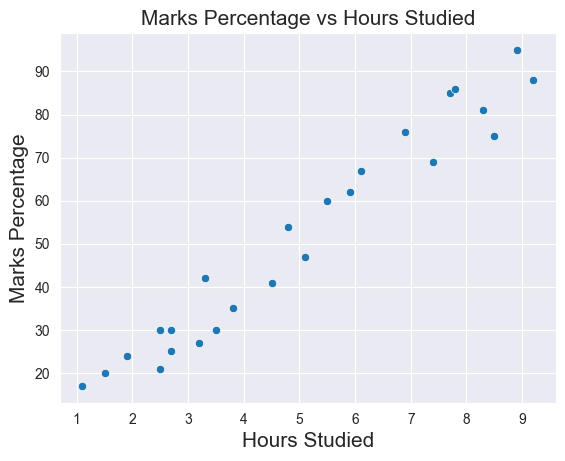

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a pleasant style for the plot
sns.set_style('darkgrid')

# Data
x = data['Hours']
y = data['Scores']

# Create a scatter plot
sns.scatterplot(x=x, y=y)

# Add title and labels with better formatting
plt.title('Marks Percentage vs Hours Studied', fontsize=15)
plt.ylabel('Marks Percentage', fontsize=15)
plt.xlabel('Hours Studied', fontsize=15)

# Show the plot
plt.show()


From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'.we can assume a positive linear relation between the number of hours studied and percentage of score.

In [13]:
# Checking the Correlation Between Hours and Study
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


###  Data Preparation

In [15]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [16]:
# Spliting the Data in four variables
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [18]:
# Fitting the Data into the model
regression = LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [19]:

print(regression.score(x_train,y_train))

0.9491209376364416


### Plotting the Line of regression

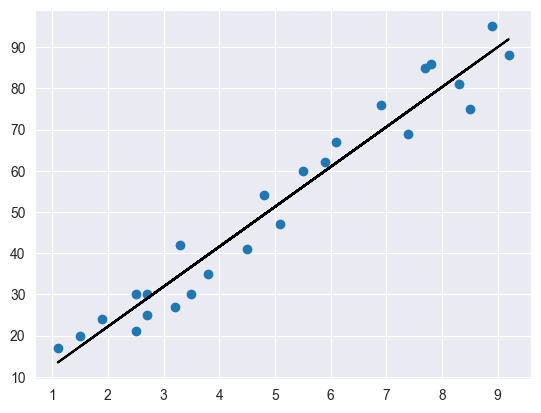

In [21]:
line= regression.coef_* x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,line,color='black');
plt.show()


In [22]:
# Testing data
print(x_test)
# Predicting values
y_pred=regression.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


### Comparsion between Actual and predicted Values


In [24]:
predicted_per=pd.DataFrame({'Actual':y_test,'predicted':y_pred})
predicted_per

,Actual,predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### What will be the predicted score if the student studies for 9.25hrs/day?


In [27]:
hours_study=9.25
prediction_for_hour= regression.predict([[hours_study]])
print(f'Predicted score for a student studied for {hours_study} is  {prediction_for_hour}')

Predicted score for a student studied for 9.25 is  [92.38611528]


In [28]:
#lets check another one for 6.3 hours
hours_study=6.30
prediction_for_hour= regression.predict([[hours_study]])
print(f'Predicted score for a student studied for {hours_study} is  {prediction_for_hour}')

Predicted score for a student studied for 6.3 is  [63.82398473]


### model validation

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


### Conclusion :   The predicted score for a student who studied for 9.25 hrs/day is 93.69173249